<a href="https://colab.research.google.com/github/minhbsdz05/AES/blob/main/Ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n_%C4%91%E1%BA%BFn_v%E1%BB%9Bi_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tải dữ liệu thành công!
5 dòng dữ liệu đầu tiên:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime,

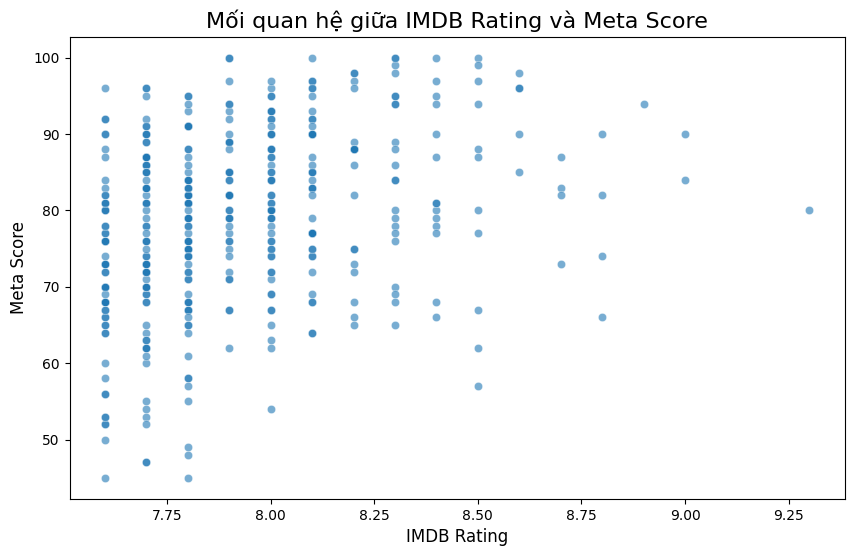

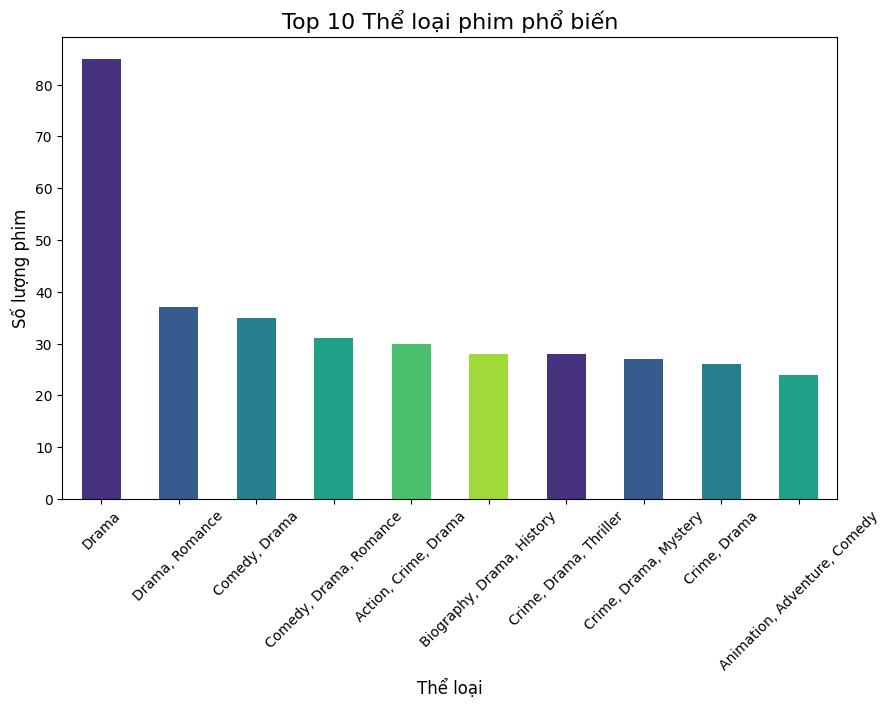

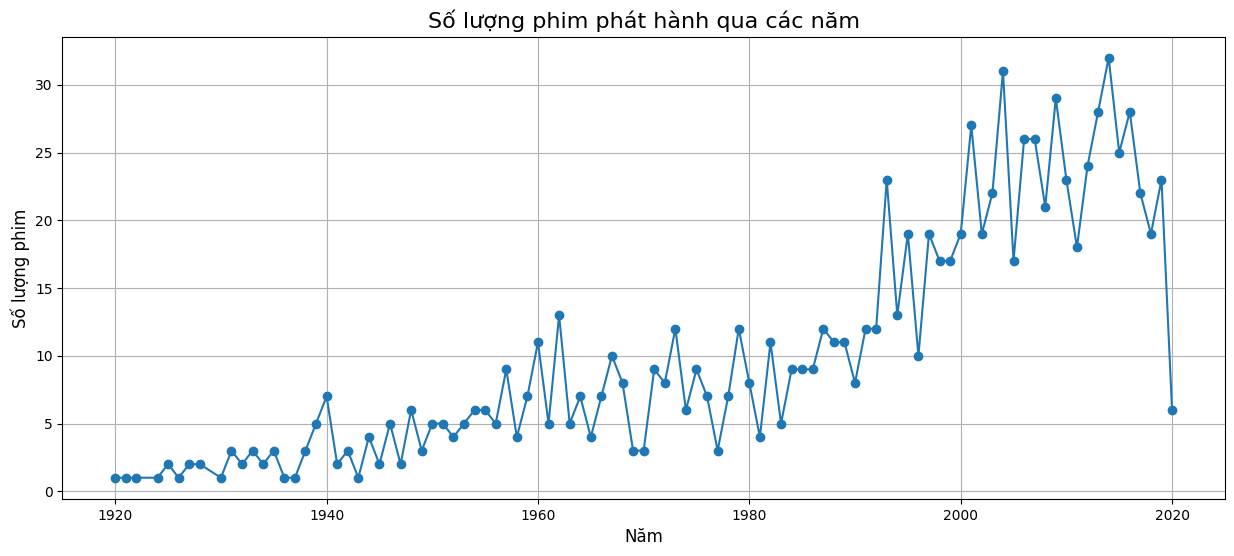

/tmp/ipython-input-2273350299.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='Genre', y='IMDB_Rating', palette='pastel')


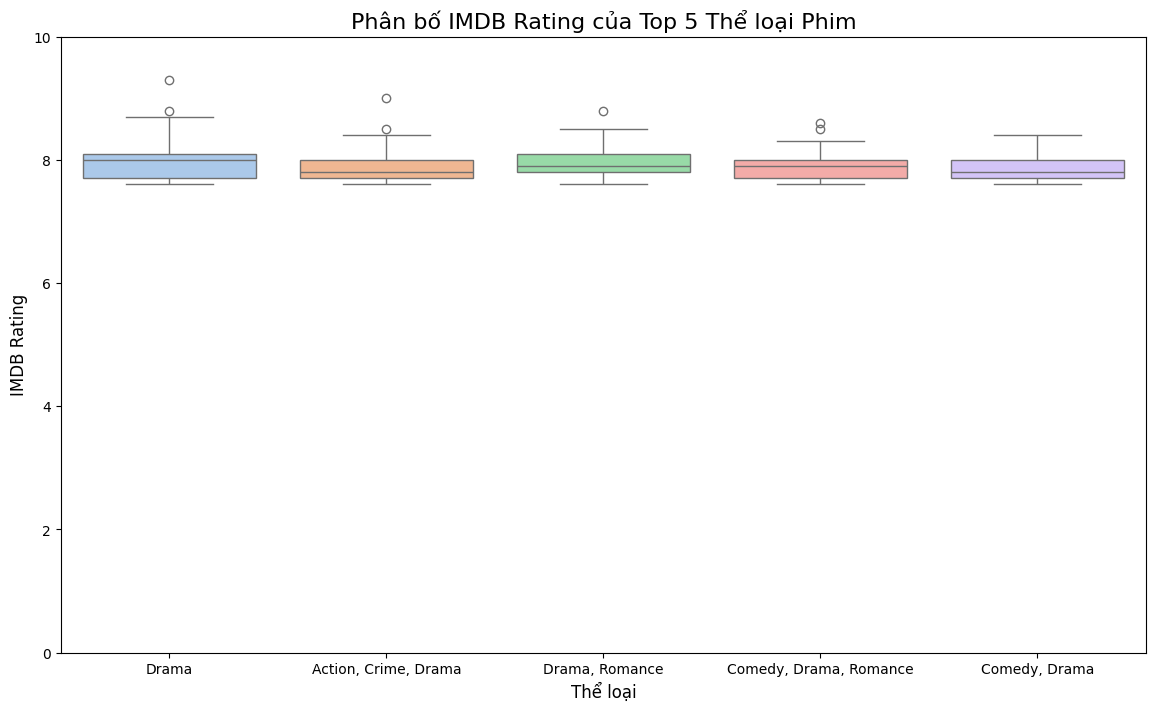

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === 3.1 Đọc dữ liệu từ file CSV ===
file_path = '/content/imdb_top_1000.csv'

try:
    df_original = pd.read_csv(file_path)
    df = df_original.copy()
    print("Tải dữ liệu thành công!")
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn '{file_path}'. Vui lòng kiểm tra lại.")

# === 3.2 Khám phá sơ bộ dữ liệu ===
print("5 dòng dữ liệu đầu tiên:")
print(df.head())

print(f"\nKích thước của bộ dữ liệu (số dòng, số cột): {df.shape}")

print("\nThông tin tổng quan về DataFrame:")
df.info()

print("\nThống kê mô tả:")
print(df.describe(include='all'))

# === 3.3 Làm sạch dữ liệu ===

# 3.3.1 Phát hiện giá trị thiếu
missing_values = df.isnull().sum()
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(missing_values[missing_values > 0])

# 3.3.2 Loại bỏ các hàng thiếu dữ liệu quan trọng
df.dropna(subset=['Released_Year', 'Genre', 'IMDB_Rating'], inplace=True)

# 3.3.3 Chuyển đổi kiểu dữ liệu Năm phát hành sang int, bỏ giá trị lỗi
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.dropna(subset=['Released_Year'], inplace=True)
df['Released_Year'] = df['Released_Year'].astype(int)

print("\nKiểu dữ liệu của các cột sau khi làm sạch:")
print(df.dtypes)

# 3.3.4 Kiểm tra và xóa dữ liệu trùng lặp
duplicate_rows = df.duplicated().sum()
print(f"\nSố lượng hàng bị trùng lặp hoàn toàn: {duplicate_rows}")
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
print("Đã loại bỏ các hàng trùng lặp.")
print(f"Kích thước cuối cùng của bộ dữ liệu: {df.shape}")

# === 3.4 Trực quan hóa dữ liệu ===

# 3.4.1 Biểu đồ phân tán IMDB_Rating vs Meta_score
plt.figure(figsize=(10, 6))
df_sample = df.sample(n=min(500, len(df)), random_state=1)
sns.scatterplot(data=df_sample, x='IMDB_Rating', y='Meta_score', alpha=0.6)
plt.title('Mối quan hệ giữa IMDB Rating và Meta Score', fontsize=16)
plt.xlabel('IMDB Rating', fontsize=12)
plt.ylabel('Meta Score', fontsize=12)
plt.show()

# 3.4.2 Biểu đồ cột Top 10 thể loại phim
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Top 10 Thể loại phim phổ biến', fontsize=16)
plt.xlabel('Thể loại', fontsize=12)
plt.ylabel('Số lượng phim', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 3.4.3 Biểu đồ đường số lượng phim theo năm
movies_per_year = df.groupby('Released_Year')['Series_Title'].count()
plt.figure(figsize=(15, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Số lượng phim phát hành qua các năm', fontsize=16)
plt.ylabel('Số lượng phim', fontsize=12)
plt.xlabel('Năm', fontsize=12)
plt.grid(True)
plt.show()

# 3.4.4 Biểu đồ hộp IMDB_Rating của top 5 thể loại phim
top_5_genres = df['Genre'].value_counts().head(5).index
df_top_genres = df[df['Genre'].isin(top_5_genres)]
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_genres, x='Genre', y='IMDB_Rating', palette='pastel')
plt.title('Phân bố IMDB Rating của Top 5 Thể loại Phim', fontsize=16)
plt.xlabel('Thể loại', fontsize=12)
plt.ylabel('IMDB Rating', fontsize=12)
plt.ylim(0, 10)
plt.show()
